In [89]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [90]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Cypher_VII"
# /content/gdrive/My Drive is the path where kaggle.json is present in the Google Drive

In [91]:
#changing the working directory
%cd /content/gdrive/My Drive/Cypher_VII

/content/gdrive/My Drive/CypherVII


In [92]:
!kaggle datasets download -d piterfm/beijing-2022-olympics

  0% 0.00/255k [00:00<?, ?B/s]
100% 255k/255k [00:00<00:00, 23.9MB/s]


In [93]:
! ls

athletes.csv		   entries_discipline.csv    kaggle.json
beijing-2022-olympics.zip  events.csv		     medals.csv
coaches.csv		   hockey_players_stats.csv  medals_total.csv
curling_results.csv	   hockey_results.csv	     technical_officials.csv


In [94]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  beijing-2022-olympics.zip
replace athletes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
#Just messing around here
medals_total = pd.read_csv('/content/gdrive/MyDrive/Cypher_VII/medals_total.csv', index_col='Country')
medals_total.head()

,Order,Gold,Silver,Bronze,Total,Order by Total,Country Code
Country,,,,,,,
Norway,1,16,8,13,37,1,NOR
Germany,2,12,10,5,27,3,GER
People's Republic of China,3,9,4,2,15,11,CHN
United States of America,4,8,10,7,25,5,USA
Sweden,5,8,5,5,18,6,SWE


In [99]:
#Still messing around...
gold_by_country = medals_total['Gold']
gold_by_country.head()

Country
Norway                        16
Germany                       12
People's Republic of China     9
United States of America       8
Sweden                         8
Name: Gold, dtype: int64

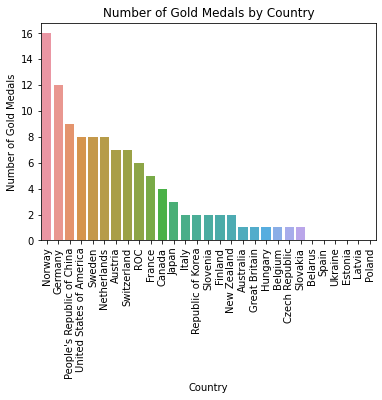

In [100]:
#Ooh! A graph!
sns.barplot(x=medals_total.index, y='Gold', data=medals_total)

plt.title('Number of Gold Medals by Country')
plt.ylabel('Number of Gold Medals')
plt.xticks(rotation = 90)
plt.show()

In [212]:
athletes = pd.read_csv('/content/gdrive/MyDrive/Cypher_VII/athletes.csv')
athletes.head()

,name,short_name,gender,birth_date,birth_place,birth_country,country,country_code,discipline,discipline_code,residence_place,residence_country,height_m/ft,url
0,AAGAARD Mikkel,AAGAARD M,Male,1995-10-18,FREDERIKSHAVN,Denmark,Denmark,DEN,Ice Hockey,IHO,ORNSKOLDSVIK,Sweden,1.84/6'0'',../../../en/results/ice-hockey/athlete-profile...
1,AALTO Antti,AALTO A,Male,1995-04-02,KITEE,Finland,Finland,FIN,Ski Jumping,SJP,KUOPIO,Finland,NaN,../../../en/results/ski-jumping/athlete-profil...
2,AALTONEN Miro,AALTONEN M,Male,1993-06-07,JOENSUU,Finland,Finland,FIN,Ice Hockey,IHO,PODOLSK,Russian Federation,1.80/5'10'',../../../en/results/ice-hockey/athlete-profile...
3,ABDELKADER Justin,ABDELKADER J,Male,1987-02-25,"MUSKEGON, MI",United States of America,United States of America,USA,Ice Hockey,IHO,"GRAND RAPIDS, MI",United States of America,1.87/6'1'',../../../en/results/ice-hockey/athlete-profile...
4,ABDI Fayik,ABDI F,Male,1997-10-07,"SAN DIEGO, CA",United States of America,Saudi Arabia,KSA,Alpine Skiing,ALP,DHAHRAN,Saudi Arabia,NaN,../../../en/results/alpine-skiing/athlete-prof...


In [213]:
athletes['gender'].unique()

array(['Male', 'Female', 'F', 'M'], dtype=object)

In [214]:
athletes_1 = athletes.copy()
#Changes 'M' and 'F' to 'Male' and 'Female'
athletes_1.loc[athletes_1['gender'] == 'M', 'gender'] = 'Male'
athletes_1.loc[athletes_1['gender'] == 'F', 'gender'] = 'Female'
athletes_1['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [215]:
athletes_1['discipline'].unique()

array(['Ice Hockey', 'Ski Jumping', 'Alpine Skiing', 'Bobsleigh',
       'Freestyle Skiing', 'Speed Skating', 'Short Track Speed Skating',
       'Cross-Country Skiing', 'Biathlon', 'Figure Skating',
       'Nordic Combined', 'Snowboard', 'Luge', 'Curling', 'Skeleton', nan],
      dtype=object)

In [216]:
athletes_1['discipline_code'].unique() #Note that each code corresponds with the above sports.

array(['IHO', 'SJP', 'ALP', 'BOB', 'FRS', 'SSK', 'STK', 'CCS', 'BTH',
       'FSK', 'NCB', 'SBD', 'LUG', 'CUR', 'SKN'], dtype=object)

In [217]:
athletes_2 = athletes_1.copy()
i=0
while i < len(athletes_2.index):
  if athletes_2.iloc[i]['discipline'] not in athletes_2['discipline'].unique(): #Detects null values
    idx = list(athletes_2['discipline_code'].unique()).index(athletes_2.iloc[i]['discipline_code']) #Gets index of sport code
    disc = list(athletes_2['discipline'].unique())[idx] #Uses index to get sport
    athletes_2.iloc[i]['discipline'] = disc #Changes null to sport
    #print(i, idx, disc)
  i += 1
athletes_2['discipline'].unique()

653 8 Biathlon
765 9 Figure Skating
892 9 Figure Skating
952 8 Biathlon
1083 7 Cross-Country Skiing
1126 9 Figure Skating
1217 0 Ice Hockey
1407 8 Biathlon
1712 8 Biathlon
1791 8 Biathlon
2237 5 Speed Skating
2498 7 Cross-Country Skiing


array(['Ice Hockey', 'Ski Jumping', 'Alpine Skiing', 'Bobsleigh',
       'Freestyle Skiing', 'Speed Skating', 'Short Track Speed Skating',
       'Cross-Country Skiing', 'Biathlon', 'Figure Skating',
       'Nordic Combined', 'Snowboard', 'Luge', 'Curling', 'Skeleton'],
      dtype=object)

In [221]:
athletes_2.head()

,name,short_name,gender,birth_date,birth_place,birth_country,country,country_code,discipline,discipline_code,residence_place,residence_country,height_m/ft,url
0,AAGAARD Mikkel,AAGAARD M,Male,1995-10-18,FREDERIKSHAVN,Denmark,Denmark,DEN,Ice Hockey,IHO,ORNSKOLDSVIK,Sweden,1.84/6'0'',../../../en/results/ice-hockey/athlete-profile...
1,AALTO Antti,AALTO A,Male,1995-04-02,KITEE,Finland,Finland,FIN,Ski Jumping,SJP,KUOPIO,Finland,NaN,../../../en/results/ski-jumping/athlete-profil...
2,AALTONEN Miro,AALTONEN M,Male,1993-06-07,JOENSUU,Finland,Finland,FIN,Ice Hockey,IHO,PODOLSK,Russian Federation,1.80/5'10'',../../../en/results/ice-hockey/athlete-profile...
3,ABDELKADER Justin,ABDELKADER J,Male,1987-02-25,"MUSKEGON, MI",United States of America,United States of America,USA,Ice Hockey,IHO,"GRAND RAPIDS, MI",United States of America,1.87/6'1'',../../../en/results/ice-hockey/athlete-profile...
4,ABDI Fayik,ABDI F,Male,1997-10-07,"SAN DIEGO, CA",United States of America,Saudi Arabia,KSA,Alpine Skiing,ALP,DHAHRAN,Saudi Arabia,NaN,../../../en/results/alpine-skiing/athlete-prof...


In [223]:
athletes_2.to_csv('/content/gdrive/My Drive/Cypher_VII/athletes_2.csv')